# Beta regression 
Data exported from `GasolineYield{betareg}` from [betareg package](https://search.r-project.org/CRAN/refmans/betareg/html/GasolineYield.html) as follows:

```r
install.packages('betareg')
data("GasolineYield", package = "betareg")
write.csv(GasolineYield, 'gasoline.csv')
```

Another possibility: `Gasoline{nlme}` from [nlme package](https://stat.ethz.ch/R-manual/R-devel/library/nlme/html/Gasoline.html).

## Probability distribution function 

$$f(y; \mu,\phi) = \frac{\Gamma(\phi)}{\Gamma(\mu\phi)\Gamma((1-\mu)\phi)}y^{\mu\phi-1}(1-y)^{(1-\mu)\phi-1}$$
$0<y<1$

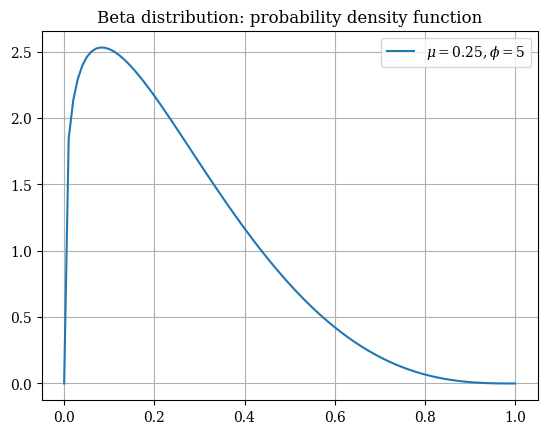

In [83]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

def beta(y, mu, phi):
  return math.gamma(phi)/(math.gamma(mu*phi)*math.gamma((1.-mu)*phi))*y**(mu*phi-1)*(1-y)**((1-mu)*phi-1)

mu = .25; phi = 5

N = 100
x = np.linspace(0, 1, N)
y = beta(x, mu, phi)


fig, ax = plt.subplots()
ax.plot(x,y, label=rf'$\mu={mu}, \phi={phi}$')
ax.grid()
ax.set_title('Beta distribution: probability density function')
ax.legend();



## Statsmodels BetaModel

Results match the obtained results with R `betareg`package, and the results presented in the Table 1 from Ferrari and Cribari-Neto (2004).

Ferrari, S.L.P., and Cribari-Neto, F. (2004). Beta Regression for Modeling Rates and Proportions. Journal of Applied Statistics, 31(7), 799–815.

```r
gy2 <- betareg(yield ~ batch + temp, data = GasolineYield)
> summary(gy2)

Call:
betareg(formula = yield ~ batch + temp, data = GasolineYield)

Quantile residuals:
    Min      1Q  Median      3Q     Max 
-2.1396 -0.5698  0.1202  0.7040  1.7506 

Coefficients (mean model with logit link):
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.1595710  0.1823247 -33.784  < 2e-16 ***
batch1       1.7277289  0.1012294  17.067  < 2e-16 ***
batch2       1.3225969  0.1179020  11.218  < 2e-16 ***
batch3       1.5723099  0.1161045  13.542  < 2e-16 ***
batch4       1.0597141  0.1023598  10.353  < 2e-16 ***
batch5       1.1337518  0.1035232  10.952  < 2e-16 ***
batch6       1.0401618  0.1060365   9.809  < 2e-16 ***
batch7       0.5436922  0.1091275   4.982 6.29e-07 ***
batch8       0.4959007  0.1089257   4.553 5.30e-06 ***
batch9       0.3857930  0.1185933   3.253  0.00114 ** 
temp         0.0109669  0.0004126  26.577  < 2e-16 ***

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)    440.3      110.0   4.002 6.29e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Type of estimator: ML (maximum likelihood)
Log-likelihood:  84.8 on 12 Df
Pseudo R-squared: 0.9617
Number of iterations: 51 (BFGS) + 3 (Fisher scoring) 

```

In [71]:
from statsmodels.othermod.betareg import BetaModel
import pandas as pd

df = pd.read_csv('data/gasoline.csv')

# Generate dummies for Batch
df = pd.get_dummies(df, prefix='Batch', columns=['Batch']).drop('Batch_10', axis=1)

# Variable names have to be capitalized
model = BetaModel.from_formula("Yield ~ Batch_1 + Batch_2 + Batch_3 + Batch_4 + Batch_5 + Batch_6 + Batch_7 + Batch_8 + Batch_9 + Temp", df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              BetaModel Results                               
==============================================================================
Dep. Variable:                  Yield   Log-Likelihood:                 84.798
Model:                      BetaModel   AIC:                            -145.6
Method:            Maximum Likelihood   BIC:                            -128.0
Date:                jue, 28 nov 2024                                         
Time:                        16:44:03                                         
No. Observations:                  32                                         
Df Residuals:                      20                                         
Df Model:                          10                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -6.1596      0.181    -34.109      0.000      -6.514      -5.806
Batch_1[T.True]     1.7277      0.102     17.018      0.000       1.529       1.927
Batch_2[T.True]     1.3226      0.118     11.232      0.000       1.092       1.553
Batch_3[T.True]     1.5723      0.116     13.536      0.000       1.345       1.800
Batch_4[T.True]     1.0597      0.102     10.342      0.000       0.859       1.261
Batch_5[T.True]     1.1338      0.103     10.963      0.000       0.931       1.336
Batch_6[T.True]     1.0402      0.106      9.801      0.000       0.832       1.248
Batch_7[T.True]     0.5437      0.109      4.984      0.000       0.330       0.757
Batch_8[T.True]     0.4959      0.109      4.568      0.000       0.283       0.709
Batch_9[T.True]     0.3858      0.119      3.243      0.001       0.153       0.619
Temp                0.0110      0.000     26.900      0.000       0.010       0.012
precision           6.0874      0.250     24.361      0.000       5.598       6.577
===================================================================================
"""